# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [ ]:
# import libraries here

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [ ]:
# your code here

#### Print `temp`.

In [ ]:
# your code here

#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### Select the rows where state is New York.

In [ ]:
# your code here

#### What is the average temperature of cities in New York?

In [ ]:
# your code here

#### Which states and cities have a temperature above 15 degrees Celsius?

In [ ]:
# your code here

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [ ]:
# your code here

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [ ]:
# your code here

#### Find the mean and standard deviation of the temperature of each state.

In [ ]:
# your code here

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\nunoc\Ambiente de Trabalho\Iron Hack\Week 4\lab-subsetting-and-descriptive-stats\your-code\Employee.csv")

#### Explore the data types of the `employees` dataframe. Comment your results.

In [12]:
print(data.head(3))
print(data.describe())
print(data.value_counts(data['Gender']))
print(data.value_counts(data['Title']))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
          Years     Salary
count  9.000000   9.000000
mean   4.111111  48.888889
std    2.803767  16.541194
min    1.000000  30.000000
25%    2.000000  35.000000
50%    3.000000  55.000000
75%    7.000000  60.000000
max    8.000000  70.000000
Gender
M    5
F    4
dtype: int64
Title
analyst      4
associate    3
VP           2
dtype: int64


In [ ]:
"""
We can observe the numerical columns basic descriptive stats. 
The company is 55% male.
It has 9 employees 4 analyst, 3 associate and 2 VP
"""

#### What's the average salary in this company?

In [14]:
data['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
data['Salary'].max()

70

#### What's the lowest salary?

In [16]:
data['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [19]:
low = data.sort_values(by='Salary', ascending=True)
low

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


#### Find all the information about an employee called David.

In [22]:
David = data[data['Name']=='David']
David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [27]:
David['Salary']

2    30
Name: Salary, dtype: int64

In [28]:
data.loc[data['Name'] == 'David', ['Name', 'Salary']]

,Name,Salary
2,David,30


In [30]:
data[data['Name']=='David'][['Name','Salary']]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate.

In [31]:
data.loc[data['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [32]:
data.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [41]:
data[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [42]:
data.iloc[:2, :3]

,Name,Department,Education
0,Jose,IT,Bachelor
1,Maria,IT,Master


#### Find the employees whose title is associate and whose salary is above 55.

In [47]:
associate_55 = data.loc[(data['Title'] == 'associate') & (data['Salary']>55)]
print(associate_55)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [67]:
#define years for grouping

bins = [0,2,4,6,8,10]
bin_labels = ['0-2','2-4','4-6','6-8','8-10']

data['Grouped Years'] = pd.cut(data['Years'], bins=bins, labels=bin_labels)

Years = data.groupby('Grouped Years').mean()
Years.iloc[:, 1:2]

C:\Users\nunoc\AppData\Local\Temp\ipykernel_10176\364925444.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Years = data.groupby('Grouped Years').mean()


,Salary
Grouped Years,
0-2,37.500000
2-4,45.000000
4-6,NaN
6-8,66.666667
8-10,NaN


In [69]:
pivot_years = data.pivot_table(index='Grouped Years', values='Salary', aggfunc='mean').reset_index()
pivot_years

,Grouped Years,Salary
0,0-2,37.500000
1,2-4,45.000000
2,6-8,66.666667


####  What is the average salary per title?

In [76]:
Title = data.groupby('Title').mean()
Title['Salary']

C:\Users\nunoc\AppData\Local\Temp\ipykernel_10176\4179048783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Title = data.groupby('Title').mean()


Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

####  Find the salary quartiles.


In [83]:
q_25 = data['Salary'].quantile(0.25)
q_50 = data['Salary'].quantile(0.50)
q_75 = data['Salary'].quantile(0.75)

print(f' The q25 is: {q_25}\n The q50 is: {q_50}\n The q75 is: {q_75}')

 The q25 is: 35.0
 The q50 is: 55.0
 The q75 is: 60.0


#### Is the mean salary different per gender?

In [88]:
salary_gender = data.pivot_table(index='Gender', values='Salary', aggfunc='mean').reset_index()
salary_gender

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



<Axes: >

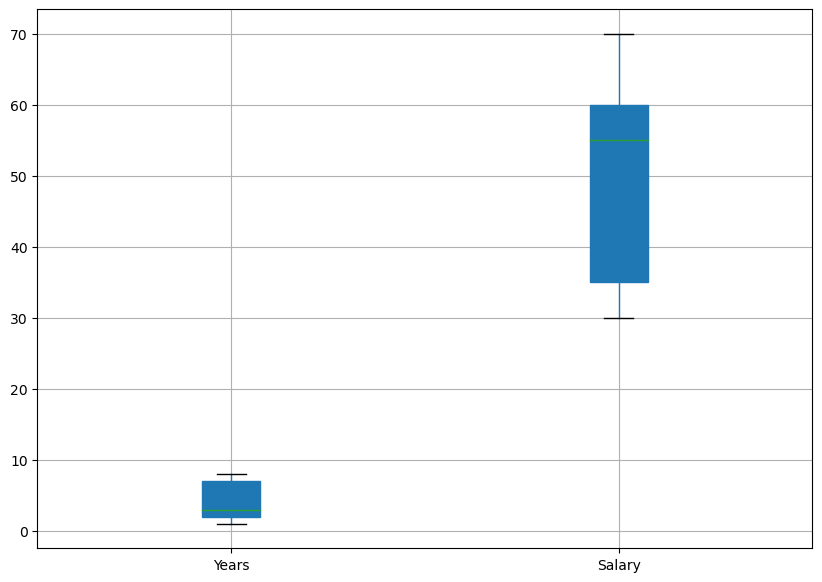

In [97]:
import matplotlib.pyplot as plt #Not the correct answer 

plt.figure(figsize =(10, 7))
data.boxplot(patch_artist=bool)

In [98]:
data.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [99]:
result = data.groupby('Department').agg({'Salary': lambda x: x.max() - x.min()})
result                                        

,Salary
Department,
HR,40
IT,40
Sales,0


In [101]:
result = data.groupby('Department')['Salary'].apply(lambda x: x.max()- x.min())
result

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [ ]:
# your code here

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

####  What is the average purchase price?

In [ ]:
# your code here

#### What are the highest and lowest purchase prices? 

In [ ]:
# your code here

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [ ]:
# your code here

#### How many customers do we have in Spain?

In [ ]:
# your code here

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [ ]:
# your code here

#### Select orders from Spain that include more than 50 items.

In [ ]:
# your code here

#### Select all free orders.

In [ ]:
# your code here

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [ ]:
# your code here

#### Select all `lunch bag` orders made in 2011.

In [ ]:
# your code here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your code here

#### Select all orders made in the month of August.

In [ ]:
# your code here

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [ ]:
# your code here

#### What's the  average amount of money spent by country?

In [ ]:
# your code here

#### What's the most expensive item?

In [ ]:
# your code here

#### What is the average amount spent per year?

In [ ]:
# your code here